## Data Exploration: Historical Trends in Patents
### Preliminary Analysis for Dashboard Visualization

This notebook serves as a preliminary exploration of historical patent data. The insights and trends identified here are visualized in an interactive dashboard, which can be viewed [here](https://public.tableau.com/views/U_S_PatentsDashboardFinal/Dash0_1Home?:language=it-IT&:display_count=n&:origin=viz_share_link). The purpose is to understand the overarching patterns in patent filings over time, across various categories, before delving into more detailed visualizations.

### Exploring the nber_categories DataFrame

In the following code cells, we will perform a data exploration on the `nber_categories` dataframe. This dataframe contains aggregated data for each macro-category (as defined by the National Bureau of Economic Research) of patents. We will start by examining its basic structure, including the number of rows and columns, data types of the columns. Additionally, we will generate some summary statistics to understand the distribution of data across different categories.

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("../csv/annual_historical.csv")
df

,year,total_app,nber11_inforce,nber12_inforce,nber13_inforce,nber14_inforce,nber15_inforce,nber19_inforce,nber21_inforce,nber22_inforce,...,nber80_iss,nber1_iss,nber2_iss,nber3_iss,nber4_iss,nber5_iss,nber6_iss,nber7_iss,nber8_iss,total_iss
0,1840,735,114,64,23,6,3,217,2,1,...,0,53,3,9,5,179,212,0,0,461
1,1841,847,129,70,26,6,3,236,2,1,...,0,49,0,8,9,212,213,0,0,491
2,1842,761,144,79,35,10,5,251,2,2,...,0,64,2,8,11,169,240,0,0,494
3,1843,819,156,84,36,11,7,273,2,3,...,0,56,1,11,3,176,250,0,0,497
4,1844,1045,167,89,36,13,9,300,2,3,...,0,66,0,13,4,167,228,0,0,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2010,339106,4955,22834,7256,34931,45044,128004,192890,170999,...,57,21936,75647,21381,51229,26488,23544,0,57,220282
171,2011,357132,4847,23130,7855,35156,45314,129749,210681,188922,...,28,22720,79011,22598,50945,27039,23137,2,28,225480
172,2012,381508,4877,23849,8466,35578,45329,133332,234024,211820,...,27,24683,93733,26741,54474,28918,25613,1,27,254190
173,2013,402538,4992,24542,9229,36452,46299,137584,259772,236554,...,7,26384,103386,31067,59235,30982,28067,0,7,279128


In [26]:
categoriesdf = pd.read_csv("../csv/patents1840-2014.csv")

In [27]:
df = df.set_index("year")
df.head()


,total_app,nber11_inforce,nber12_inforce,nber13_inforce,nber14_inforce,nber15_inforce,nber19_inforce,nber21_inforce,nber22_inforce,nber23_inforce,...,nber80_iss,nber1_iss,nber2_iss,nber3_iss,nber4_iss,nber5_iss,nber6_iss,nber7_iss,nber8_iss,total_iss
year,,,,,,,,,,,,,,,,,,,,,
1840,735,114,64,23,6,3,217,2,1,0,...,0,53,3,9,5,179,212,0,0,461
1841,847,129,70,26,6,3,236,2,1,0,...,0,49,0,8,9,212,213,0,0,491
1842,761,144,79,35,10,5,251,2,2,0,...,0,64,2,8,11,169,240,0,0,494
1843,819,156,84,36,11,7,273,2,3,0,...,0,56,1,11,3,176,250,0,0,497
1844,1045,167,89,36,13,9,300,2,3,0,...,0,66,0,13,4,167,228,0,0,478


In [28]:
#Retrieve the dataframe with the aggregated columns for each macro-category
nber_categories = df.iloc[:,40:46]
nber_categories.columns = ['Chemical',
                           'Computers & Communications',
                           'Drugs & Medical',
                           'Electrical & Electronic',
                           'Mechanical',
                           'Others']
nber_categories.head()

,Chemical,Computers & Communications,Drugs & Medical,Electrical & Electronic,Mechanical,Others
year,,,,,,
1840,427,35,73,53,1537,1894
1841,470,32,81,62,1727,2078
1842,524,31,88,70,1869,2286
1843,567,30,99,71,2001,2480
1844,614,28,110,75,2128,2640


In [29]:
#Retrieve aggregated data for each macro-category
drugs = nber_categories["Drugs & Medical"]
chemical = nber_categories["Chemical"]
computers = nber_categories["Computers & Communications"]
electronic = nber_categories["Electrical & Electronic"]
mechanical = nber_categories["Mechanical"]
others = nber_categories["Others"]

In [30]:
# Basic Data Exploration of nber_categories DataFrame

# Displaying the first few rows of the dataframe
display(nber_categories.head())

# Displaying the shape of the dataframe
print("Dataframe Shape:", nber_categories.shape)

# Displaying the data types of each column
print("\nData Types:\n", nber_categories.dtypes)

# Generating summary statistics
print("\nSummary Statistics:\n", nber_categories.describe())

,Chemical,Computers & Communications,Drugs & Medical,Electrical & Electronic,Mechanical,Others
year,,,,,,
1840,427,35,73,53,1537,1894
1841,470,32,81,62,1727,2078
1842,524,31,88,70,1869,2286
1843,567,30,99,71,2001,2480
1844,614,28,110,75,2128,2640


Dataframe Shape: (175, 6)

Data Types:
 Chemical                      int64
Computers & Communications    int64
Drugs & Medical               int64
Electrical & Electronic       int64
Mechanical                    int64
Others                        int64
dtype: object

Summary Statistics:
             Chemical  Computers & Communications  Drugs & Medical  \
count     175.000000                  175.000000       175.000000   
mean    99435.474286                63836.960000     30605.074286   
std     95011.243583               140864.022286     55443.355064   
min       427.000000                   20.000000        73.000000   
25%     20404.000000                 1807.500000      2892.500000   
50%     60025.000000                14547.000000      8229.000000   
75%    192443.000000                47951.000000     19981.500000   
max    272992.000000               847059.000000    257154.000000   

       Electrical & Electronic     Mechanical         Others  
count                17

### Data Visualization Using OOP Matplotlib

In this section, we will create data visualizations using the Object-Oriented Programming (OOP) approach of Matplotlib. The visualizations will further explore the dataset, providing insights into different aspects of the historical patent data.

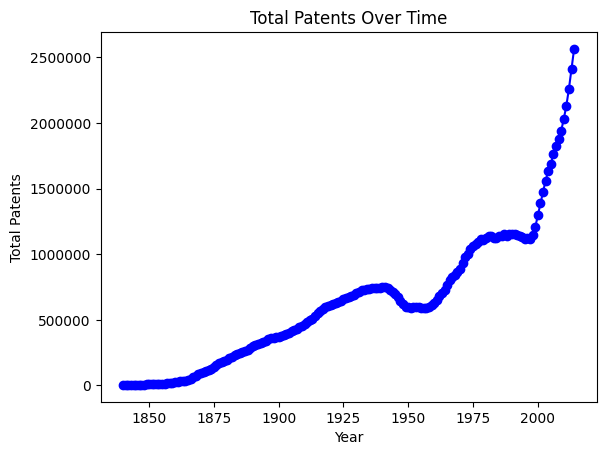

In [31]:
# Visualization 1: Line Plot of Patents Over Time

year = nber_categories.index
nber_categories['Total_Patents'] = nber_categories.sum(axis=1)
total_patents = nber_categories['Total_Patents']

# Creating a line plot
fig, ax = plt.subplots()
ax.plot(year, total_patents, color='blue', marker='o')

# Adding title and labels
ax.set_title('Total Patents Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Total Patents')

# Removing scientific notation from the y-axis
ax.ticklabel_format(style='plain', axis='y')

# Displaying the plot
plt.show()

Text(0.5, 1.0, 'Total Patents in Force 1840-2014')

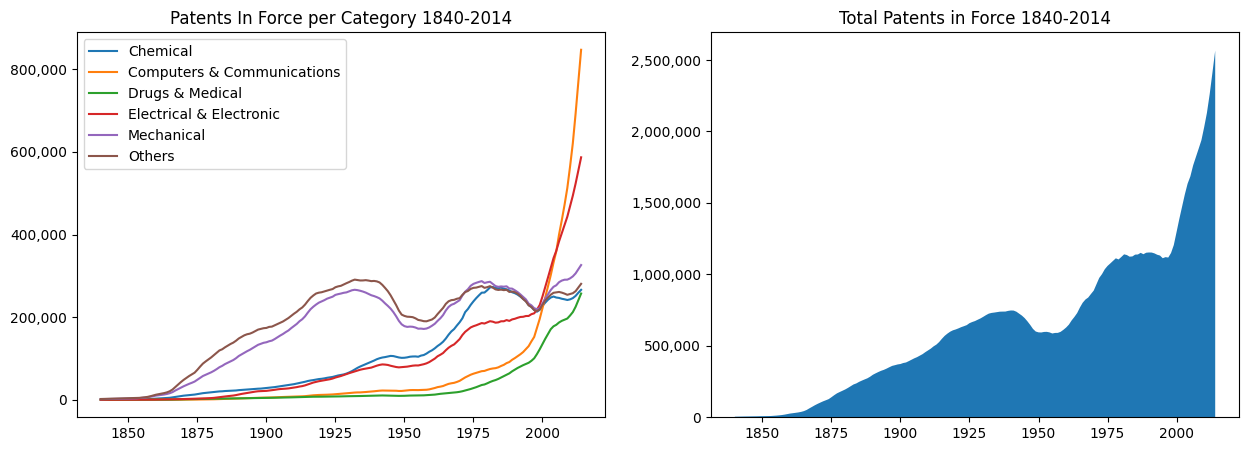

In [32]:
def format_with_commas(value,pos):
    return "{:,.0f}".format(value)
commaformatter = FuncFormatter(format_with_commas)

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
indcat = 39
for column in df.columns[40:46]:
    axes[0].plot(df.index, df[column],label=categoriesdf.loc[indcat,"CatNameLong"])
    indcat +=1 

axes[0].legend()
axes[0].set_title("Patents In Force per Category 1840-2014")
axes[0].yaxis.set_major_formatter(commaformatter)


formatter = ScalarFormatter()
formatter.set_scientific(False)


axes[1].stackplot(df.index, df["total_inforce"])
#axes[1].set_yscale('log')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(commaformatter)
axes[1].set_title("Total Patents in Force 1840-2014")


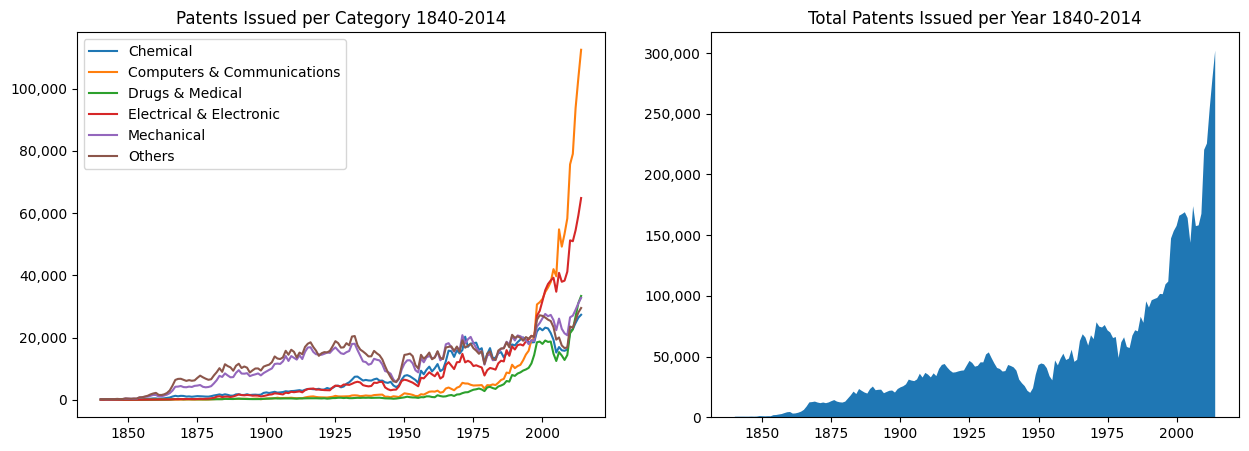

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))
indcat = 88
indx = 0
for column in df.columns[136:142]:
    axes[0].plot(df.index, df[column],label=nber_categories.columns[indx])
    indcat +=1 
    indx += 1

axes[0].legend()
axes[0].set_title("Patents Issued per Category 1840-2014")
axes[0].yaxis.set_major_formatter(commaformatter)


formatter = ScalarFormatter()
formatter.set_scientific(False)


axes[1].stackplot(df.index, df["total_iss"])
#axes[1].set_yscale('log')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(commaformatter)
axes[1].set_title("Total Patents Issued per Year 1840-2014")

plt.show()


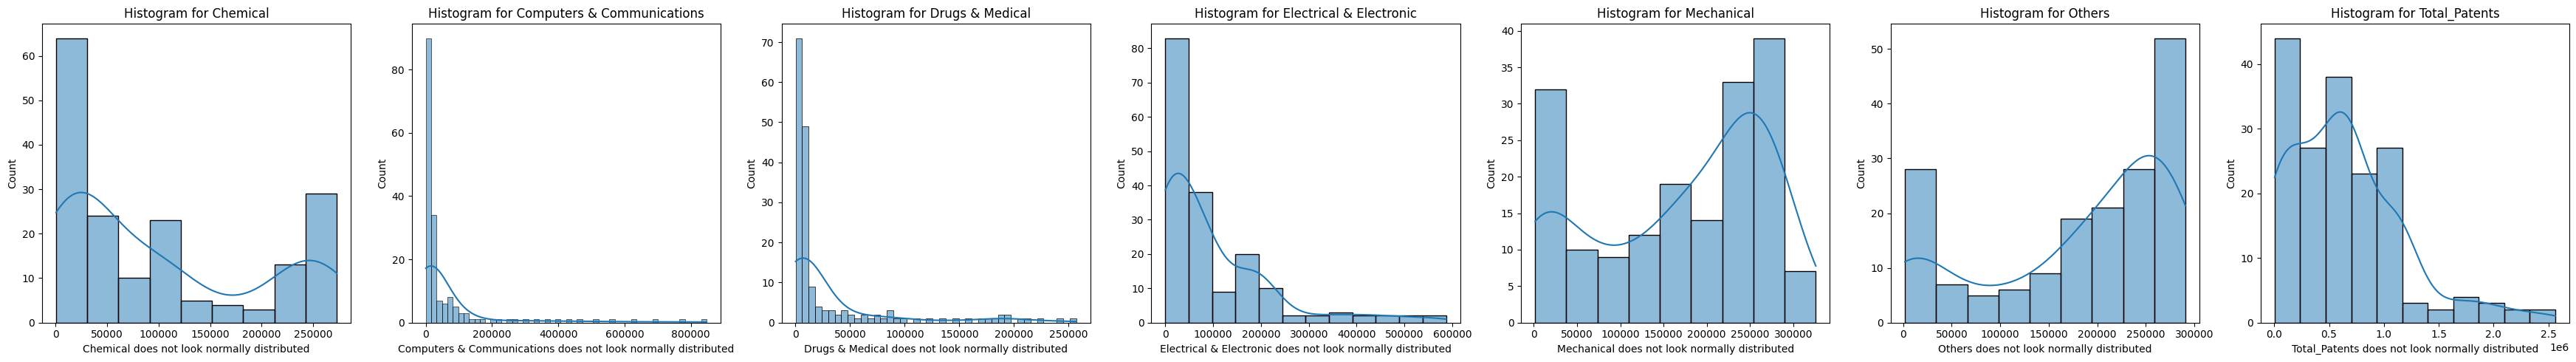

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Number of columns in the DataFrame
num_columns = len(nber_categories.columns)

# Create a figure and set of subplots for histograms, aligned horizontally
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(5 * num_columns, 5))

for i, column in enumerate(nber_categories.columns):
    sns.histplot(nber_categories[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

    # Shapiro-Wilk Test for Normality
    stat, p = shapiro(nber_categories[column])
    alpha = 0.05
    if p > alpha:
        axes[i].set_xlabel(f'{column} looks normally distributed')
    else:
        axes[i].set_xlabel(f'{column} does not look normally distributed')

plt.tight_layout()
plt.show()


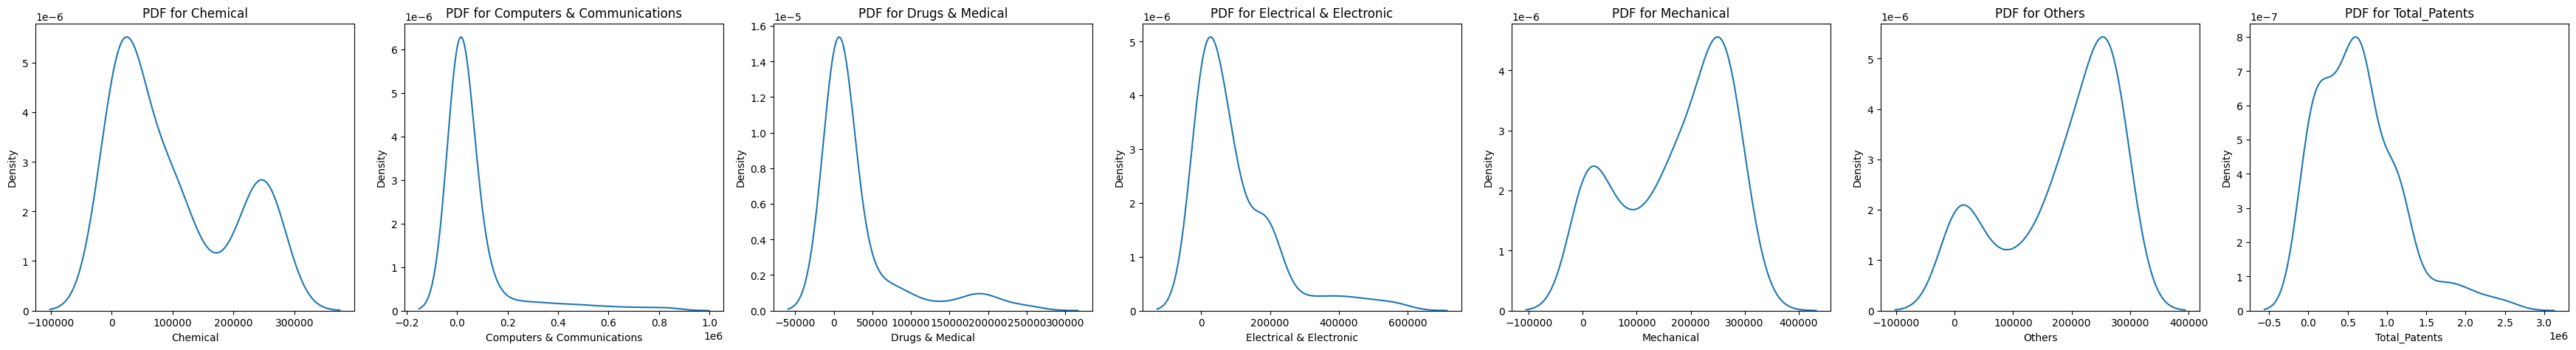

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of columns in the DataFrame
num_columns = len(nber_categories.columns)

# Create a figure and set of subplots for PDFs, aligned horizontally
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(5 * num_columns, 5))

for i, column in enumerate(nber_categories.columns):
    sns.kdeplot(nber_categories[column], ax=axes[i])
    axes[i].set_title(f'PDF for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


## Visualizing inter-relationships among subcategories.
This code cell is designed for creating a series of scatter plots to visualize relationships between pairs of columns in a DataFrame `nber_categories`. Here's a breakdown of its purpose:

1. **Import itertools**: This module provides tools for creating iterators for efficient looping.

2. **Calculate Number of Scatter Plots**: Using `itertools.combinations`, it calculates the number of unique pairs of columns from `nber_categories` to determine how many scatter plots are needed.

3. **Grid Layout Calculation**: It calculates the number of rows and columns needed for the subplot grid. The grid dimensions are determined based on the square root of the number of scatter plots, ensuring a nearly square layout to accommodate all plots.

4. **Create Figure and Subplots**: The code then initializes a figure and a set of subplots using `plt.subplots`. The size of the figure is dynamically adjusted based on the number of rows and columns calculated.

5. **Flatten Axes Array**: The axes array is flattened for easy indexing, allowing each subplot to be accessed sequentially.

6. **Generate Scatter Plots**: For each unique pair of columns, a scatter plot is generated using Seaborn's `scatterplot`. The plots are titled according to the pairs of columns they represent.

7. **Remove Empty Subplots**: Any extra subplots in the grid (if the total number of plots is not a perfect square) are removed for a cleaner presentation.

8. **Display the Plots**: Finally, the layout is adjusted for tight spacing and the plots are displayed with `plt.show()`.


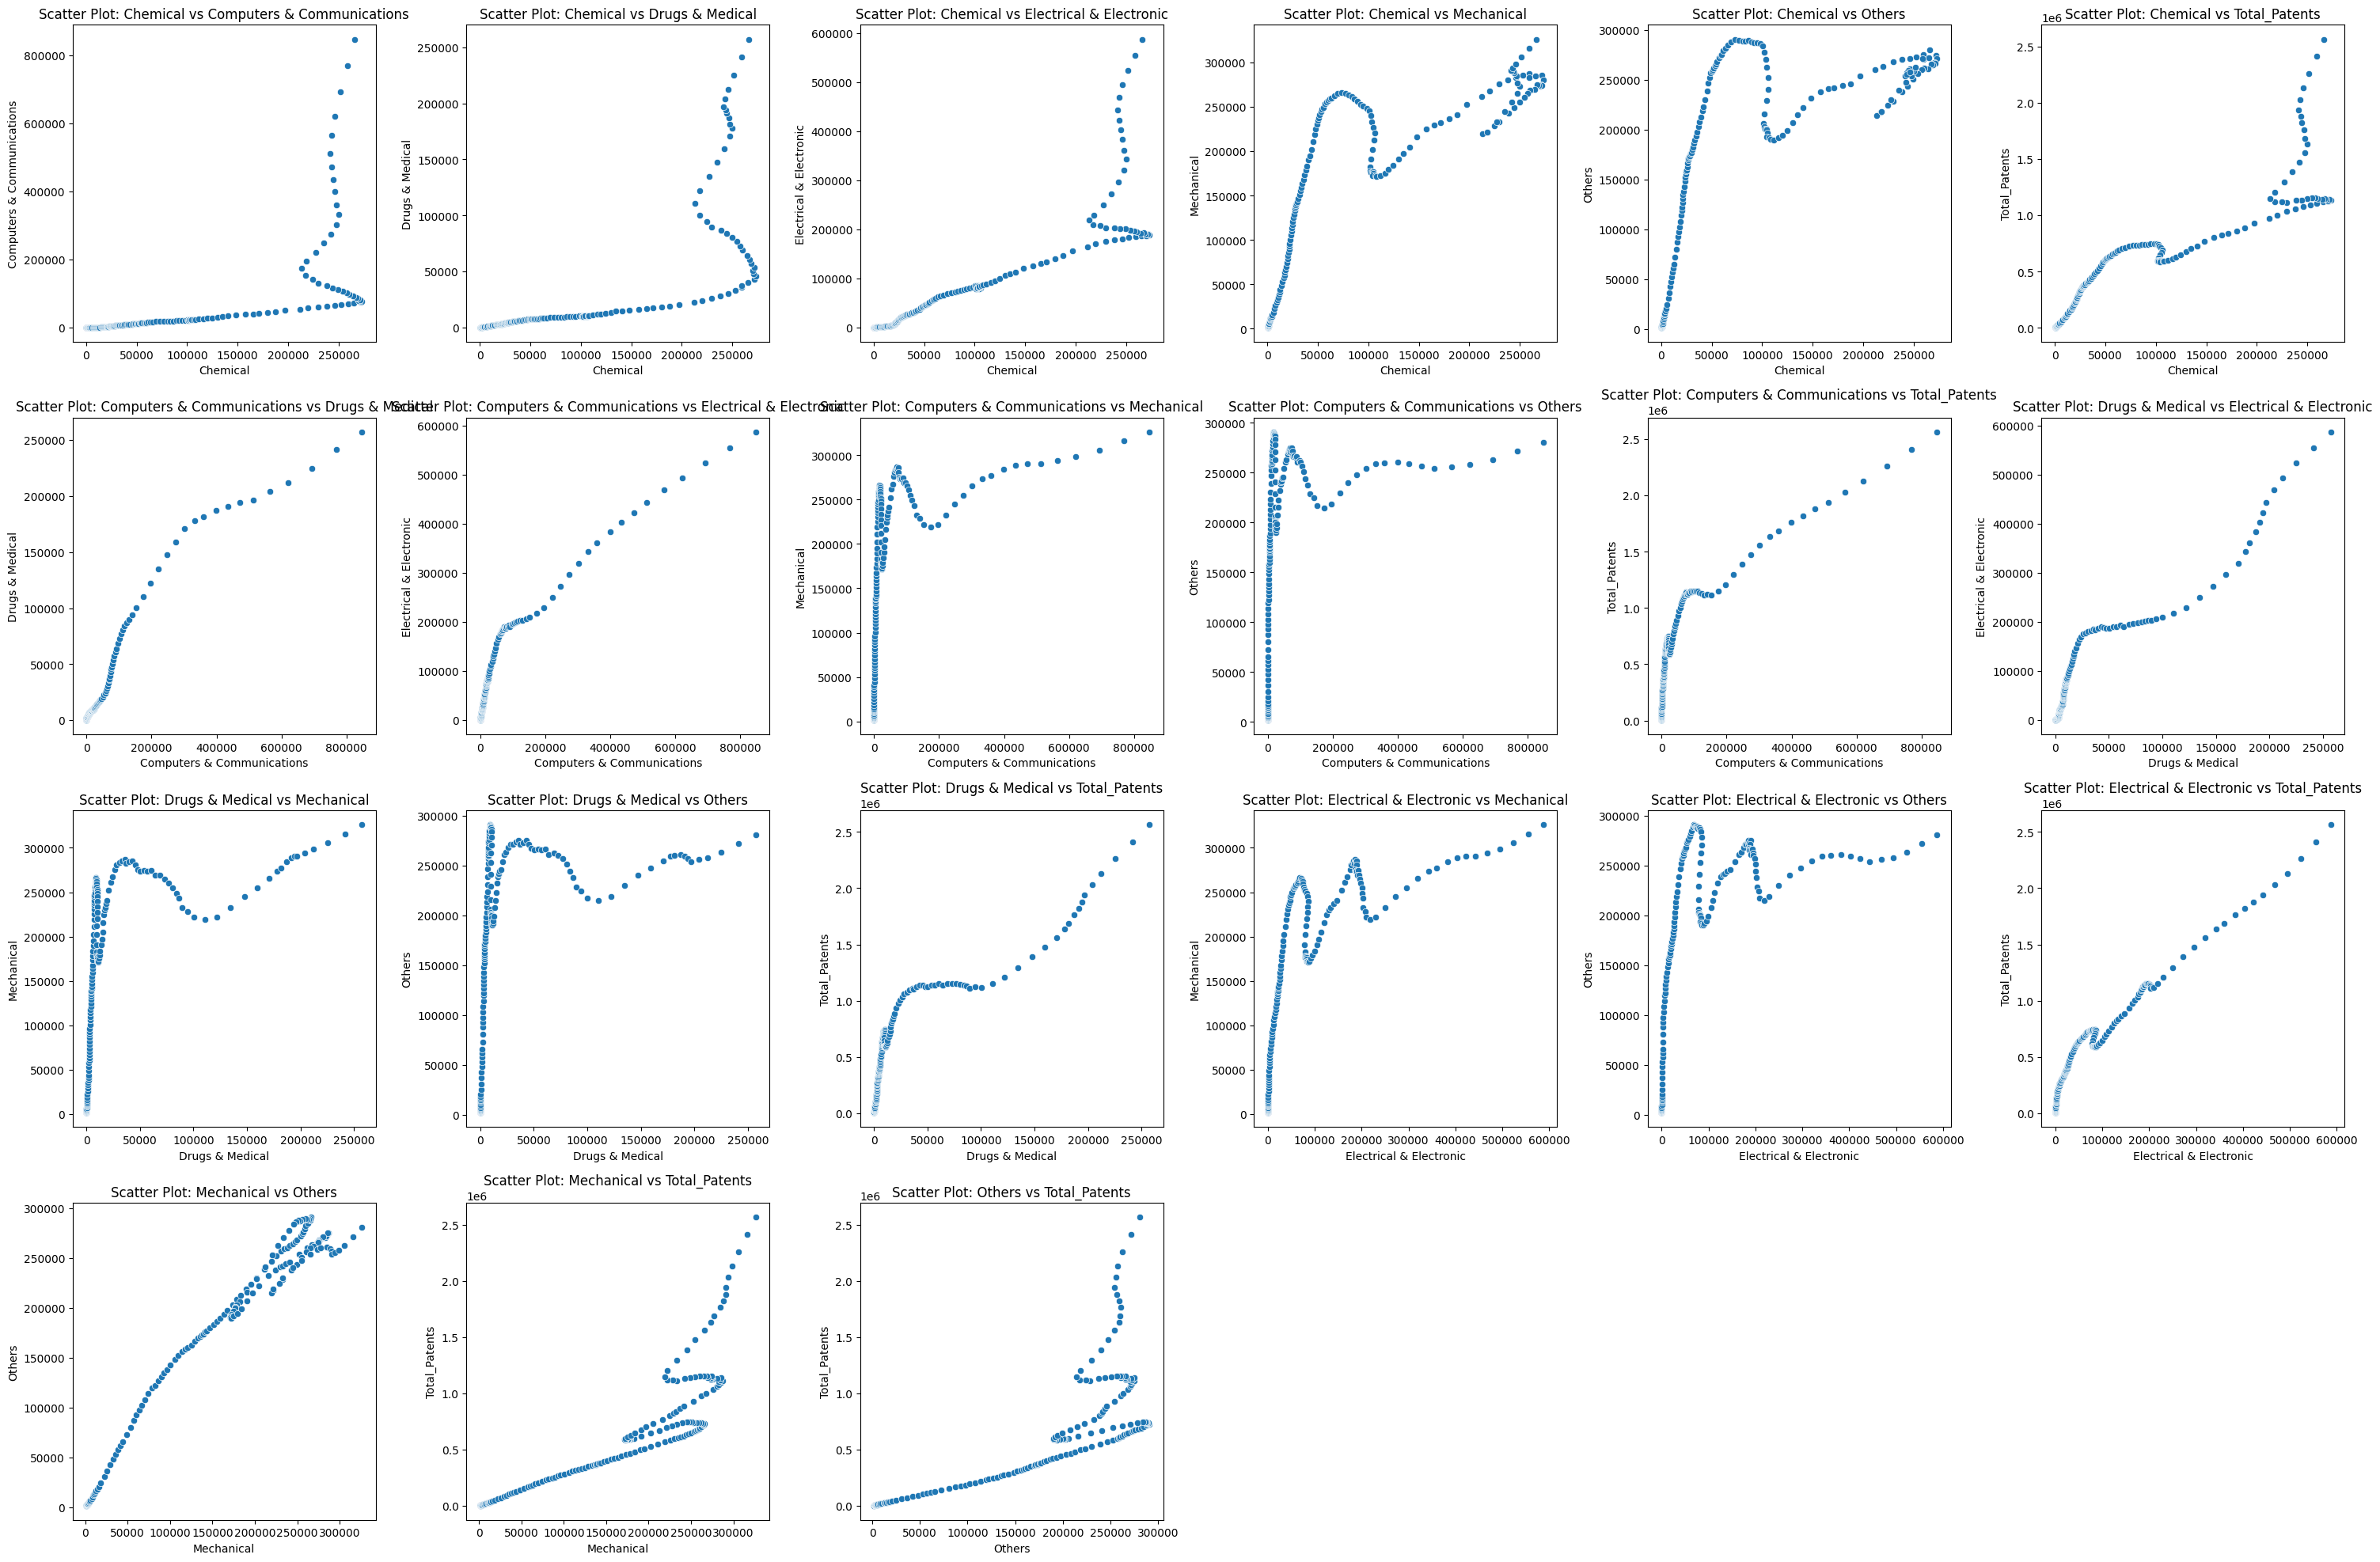

In [47]:
import itertools

# Number of scatter plots required
num_scatter_plots = len(list(itertools.combinations(nber_categories.columns, 2)))

# Calculate the number of rows and columns for the grid
num_rows = int(num_scatter_plots**0.5)
num_cols = int(num_scatter_plots / num_rows) + (num_scatter_plots % num_rows > 0)

# Create a figure and set of subplots for scatter plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten the axes array for easy indexing
axes_flat = axes.flatten()

# Generate scatter plots
for i, (col1, col2) in enumerate(itertools.combinations(nber_categories.columns, 2)):
    sns.scatterplot(data=nber_categories, x=col1, y=col2, ax=axes_flat[i])
    axes_flat[i].set_title(f'Scatter Plot: {col1} vs {col2}')

# Remove empty subplots if any
for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()


In [36]:
nber_subcategories = df.iloc[:,1:39]

In [37]:
corr_matrix_subcategories = nber_subcategories.corr(method="spearman")
corr_matrix_subcategories.head()

,nber11_inforce,nber12_inforce,nber13_inforce,nber14_inforce,nber15_inforce,nber19_inforce,nber21_inforce,nber22_inforce,nber23_inforce,nber24_inforce,...,nber61_inforce,nber62_inforce,nber63_inforce,nber64_inforce,nber65_inforce,nber66_inforce,nber67_inforce,nber68_inforce,nber69_inforce,nber70_inforce
nber11_inforce,1.000000,0.958996,0.950075,0.978603,0.948626,0.965159,0.946426,0.944170,0.930051,0.921398,...,0.933706,0.922236,0.422994,0.914633,0.667182,0.473897,0.962971,0.943613,0.864926,0.783703
nber12_inforce,0.958996,1.000000,0.969551,0.951012,0.988041,0.993643,0.990118,0.988246,0.974751,0.965210,...,0.889134,0.964600,0.359631,0.916682,0.686535,0.399976,0.922116,0.905507,0.908755,0.858333
nber13_inforce,0.950075,0.969551,1.000000,0.950856,0.957912,0.975850,0.957948,0.954817,0.939752,0.948767,...,0.933399,0.970840,0.392853,0.967132,0.760781,0.473454,0.939465,0.940241,0.926559,0.788204
nber14_inforce,0.978603,0.951012,0.950856,1.000000,0.962158,0.968716,0.957837,0.957670,0.943263,0.924159,...,0.934309,0.907565,0.402927,0.915773,0.656109,0.410253,0.942813,0.921703,0.842823,0.749109
nber15_inforce,0.948626,0.988041,0.957912,0.962158,1.000000,0.990874,0.996405,0.996228,0.981383,0.961522,...,0.888085,0.946219,0.331445,0.904055,0.652348,0.351200,0.897559,0.882410,0.874218,0.834282


## Correlation Matrix of Subcategories

This code cell creates a mask for the correlation matrix of the subcategories in the `nber_subcategories` dataframe. The mask is used to hide the upper triangle of the matrix, as it is a mirror of the lower triangle. This is a common practice in visualizing correlation matrices to make them easier to read and interpret.

In [38]:
mask = np.triu(np.ones_like(corr_matrix_subcategories, dtype=bool))

## Masked Correlation Matrix

This code cell applies the previously created mask to the correlation matrix of the subcategories. The result is a masked correlation matrix where the upper triangle is hidden. This matrix will be used for further analysis or visualization, providing a clearer view of the correlations between different subcategories of patents.

In [39]:
corr_matrix_subcategories_masked = corr_matrix_subcategories.mask(mask)

## Heatmap of Correlation Matrix

In this code cell, we will create a heatmap to visualize the masked correlation matrix of the subcategories. A heatmap is an effective way to display the strength and direction of correlations between different variables. The colors in the heatmap will represent the correlation values, making it easier to identify patterns and relationships between the subcategories of patents.

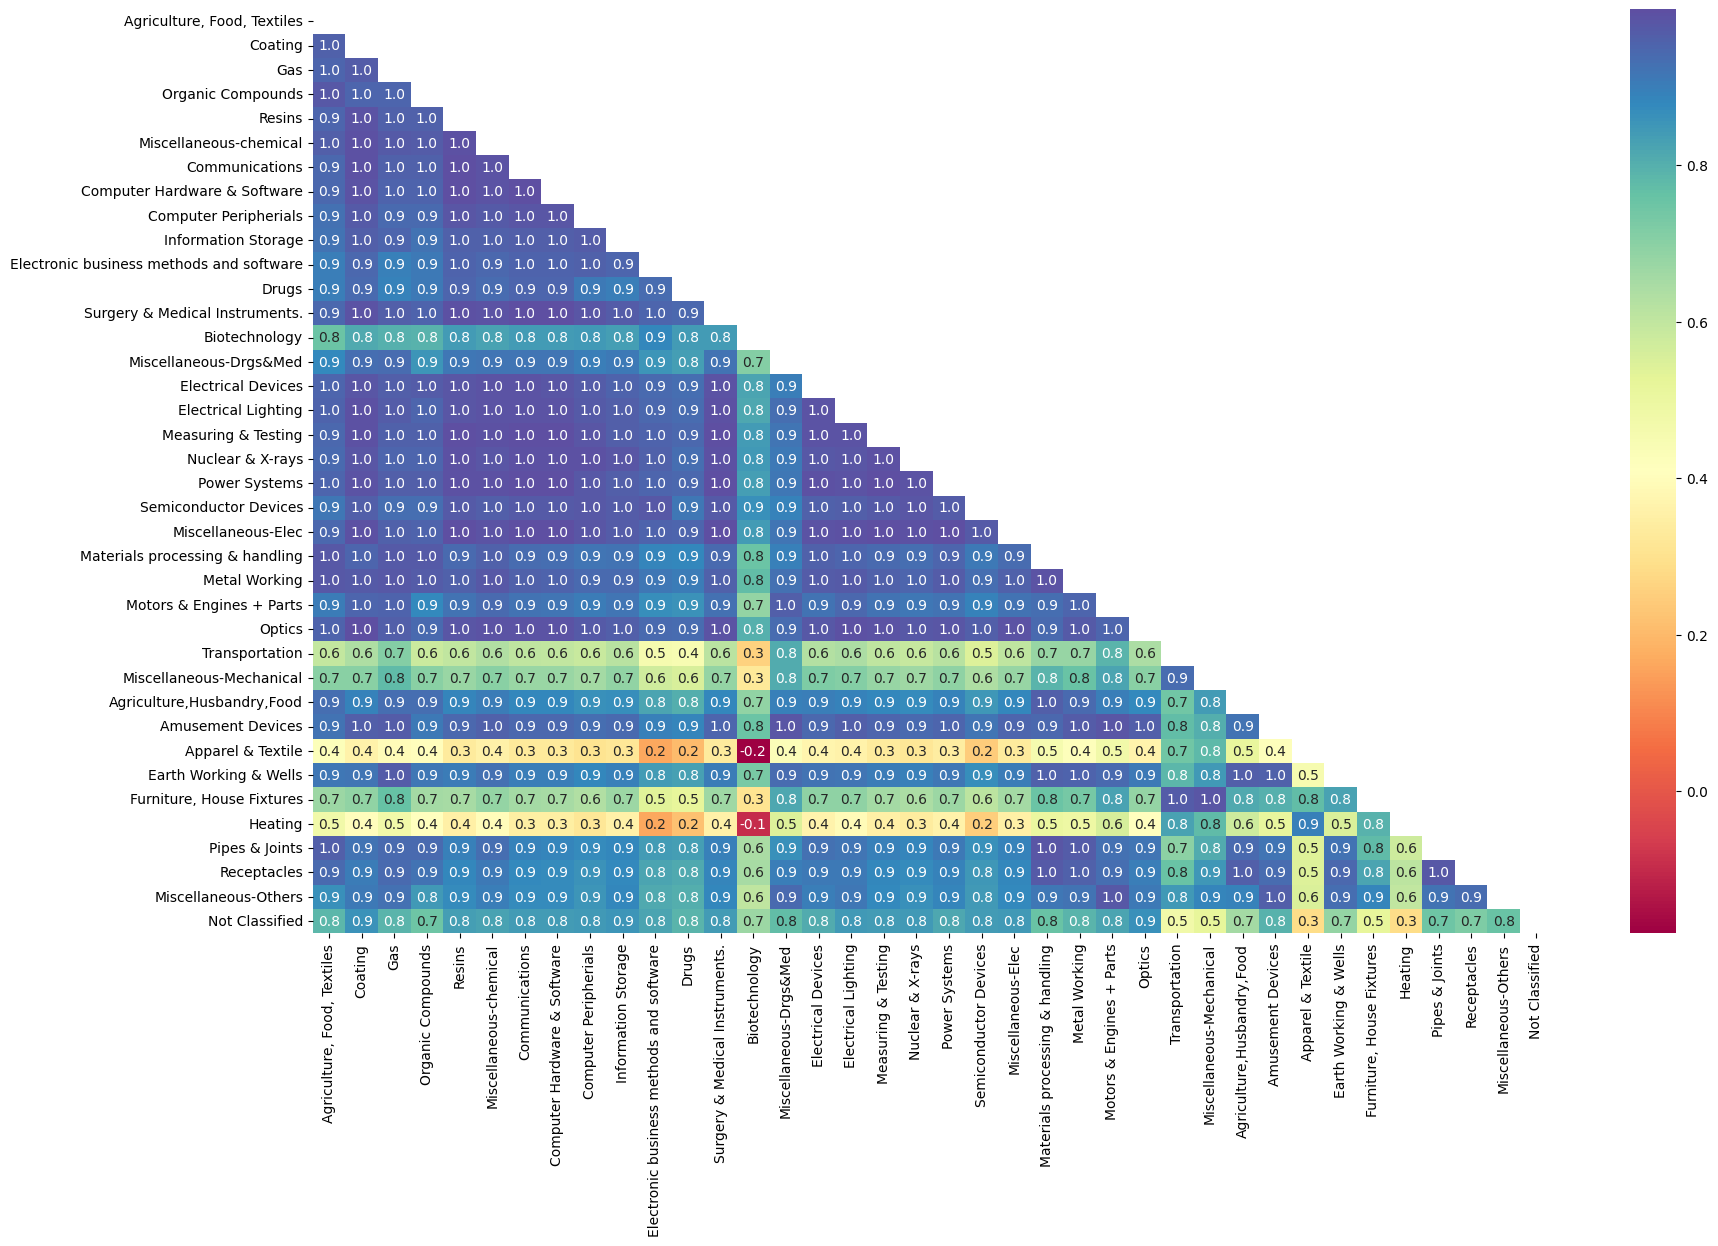

In [40]:
fig, ax = plt.subplots(figsize=(20,12))

# Reading the subcategories.csv file
subcat = pd.read_csv("../csv/subcategories.csv")
subcategories_name = []

# Extracting the subcategory names
for subcategory in subcat.iloc[:-1,2]:
    subcategories_name.append(subcategory)

# Creating a heatmap of the masked correlation matrix
sns.heatmap(data=corr_matrix_subcategories_masked, annot=True, ax=ax, fmt="0.1f", cmap="Spectral", xticklabels=subcategories_name, yticklabels=subcategories_name)
plt.show()